# Dataset Description
## Context
<br>
Speech is the most natural way of expressing ourselves as humans. It is only natural then to extend this communication medium to computer applications. We define speech emotion recognition (SER) systems as a collection of methodologies that process and classify speech signals to detect the embedded emotions. SER is not a new field, it has been around for over two decades, and has regained attention thanks to the recent advancements. These novel studies make use of the advances in all fields of computing and technology, making it necessary to have an update on the current methodologies and techniques that make SER possible. We have identified and discussed distinct areas of SER, provided a detailed survey of current literature of each, and also listed the current challenges.

## Content
Here 4 most popular datasets in English: Crema, Ravdess, Savee and Tess. Each of them contains audio in .wav format with some main labels.
<br>
Ravdess:
<br>
Here is the filename identifiers as per the official RAVDESS website:
<br>
* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.wav This means the meta data for the audio file is:
<br>
* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

Crema:
<br>
The third component is responsible for the emotion label:
<br>
* SAD - sadness;
* ANG - angry;
* DIS - disgust;
* FEA - fear;
* HAP - happy;
* NEU - neutral.

Tess:

Very similar to Crema - label of emotion is contained in the name of file.

Savee:
<br>
The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:
<br>
* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'su' = 'surprise'

In [1]:
import os

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Crema',
 'models',
 'Ravdess',
 'Savee',
 'Speech Emotion Recognition.ipynb',
 'Tess']

In [4]:
!pip install patool
import patoolib
patoolib.extract_archive("Speech Emotion Recognition Dataset.zip", outdir="D:\My Project\Speech Emotion Recognition", interactive=True)

patool: Extracting Speech Emotion Recognition Dataset.zip ...
patool: ... Speech Emotion Recognition Dataset.zip extracted to `D:\My Project\Speech Emotion Recognition'.


'D:\\My Project\\Speech Emotion Recognition'

# Define Dataset Path

In [3]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Crema',
 'models',
 'Ravdess',
 'Savee',
 'Speech Emotion Recognition.ipynb',
 'Tess']

In [4]:
crema_path = 'Crema/'
ravdess_path = 'Ravdess/'
savee_path = 'Savee/'
tess_path = 'Tess/'

Check sample filenames from each dataset

In [5]:
print("Crema audio filename sample:")
print(os.listdir(crema_path)[:5], '\n')
print("Ravdess audio filename sample:")
print(os.listdir(ravdess_path)[:5], '\n')
print("Savee audio filename sample:")
print(os.listdir(savee_path)[:5], '\n')
print("Tess audio filename sample:")
print(os.listdir(tess_path)[:5], '\n')

Crema audio filename sample:
['1001_DFA_ANG_XX.wav', '1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav'] 

Ravdess audio filename sample:
['audio_speech_actors_01-24'] 

Savee audio filename sample:
['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav'] 

Tess audio filename sample:
['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral'] 



# Create dataframe containing names of path and emotion for each audio file based on  Dataset Description

## Crema Dataset

In [6]:
os.listdir(crema_path)[1]

'1001_DFA_DIS_XX.wav'

In [7]:
os.listdir(crema_path)[1].partition('.wav')[0].split('_')

['1001', 'DFA', 'DIS', 'XX']

I will use above function to define the emotion and filepath

In [8]:
crema_list = []

for wav in os.listdir(crema_path):
    emotion = wav.partition(".wav")[0].split('_')[2]
    if emotion == 'SAD':
        crema_list.append(('sadness', crema_path+wav))
    elif emotion == 'ANG':
        crema_list.append(('angry', crema_path+wav))
    elif emotion == 'DIS':
        crema_list.append(('disgust', crema_path+wav))
    elif emotion == 'FEA':
        crema_list.append(('fear', crema_path+wav))
    elif emotion == 'HAP':
        crema_list.append(('happy', crema_path+wav))
    elif emotion == 'NEU':
        crema_list.append(('neutral', crema_path+wav))
    else:
        crema_list.append(('unknown', crema_path+wav))

print("Sample crema_list :")
print(crema_list[:5])

Sample crema_list :
[('angry', 'Crema/1001_DFA_ANG_XX.wav'), ('disgust', 'Crema/1001_DFA_DIS_XX.wav'), ('fear', 'Crema/1001_DFA_FEA_XX.wav'), ('happy', 'Crema/1001_DFA_HAP_XX.wav'), ('neutral', 'Crema/1001_DFA_NEU_XX.wav')]


In [9]:
import pandas as pd

In [10]:
df_crema = pd.DataFrame(crema_list, columns=['emotion', 'file_path'])
df_crema.head()

,emotion,file_path
0,angry,Crema/1001_DFA_ANG_XX.wav
1,disgust,Crema/1001_DFA_DIS_XX.wav
2,fear,Crema/1001_DFA_FEA_XX.wav
3,happy,Crema/1001_DFA_HAP_XX.wav
4,neutral,Crema/1001_DFA_NEU_XX.wav


In [11]:
df_crema['emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sadness'],
      dtype=object)

## Radvess Dataset

In [12]:
os.listdir(ravdess_path)

['audio_speech_actors_01-24']

In [13]:
os.listdir(os.path.join(ravdess_path, os.listdir(ravdess_path)[0]))

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [14]:
os.path.join(ravdess_path, os.listdir(ravdess_path)[0])

'Ravdess/audio_speech_actors_01-24'

In [15]:
ravdess_path = os.path.join(ravdess_path, os.listdir(ravdess_path)[0])
ravdess_path

'Ravdess/audio_speech_actors_01-24'

In [16]:
for path in os.listdir(ravdess_path):
    paths = ravdess_path+'/'+path
    print(paths)

Ravdess/audio_speech_actors_01-24/Actor_01
Ravdess/audio_speech_actors_01-24/Actor_02
Ravdess/audio_speech_actors_01-24/Actor_03
Ravdess/audio_speech_actors_01-24/Actor_04
Ravdess/audio_speech_actors_01-24/Actor_05
Ravdess/audio_speech_actors_01-24/Actor_06
Ravdess/audio_speech_actors_01-24/Actor_07
Ravdess/audio_speech_actors_01-24/Actor_08
Ravdess/audio_speech_actors_01-24/Actor_09
Ravdess/audio_speech_actors_01-24/Actor_10
Ravdess/audio_speech_actors_01-24/Actor_11
Ravdess/audio_speech_actors_01-24/Actor_12
Ravdess/audio_speech_actors_01-24/Actor_13
Ravdess/audio_speech_actors_01-24/Actor_14
Ravdess/audio_speech_actors_01-24/Actor_15
Ravdess/audio_speech_actors_01-24/Actor_16
Ravdess/audio_speech_actors_01-24/Actor_17
Ravdess/audio_speech_actors_01-24/Actor_18
Ravdess/audio_speech_actors_01-24/Actor_19
Ravdess/audio_speech_actors_01-24/Actor_20
Ravdess/audio_speech_actors_01-24/Actor_21
Ravdess/audio_speech_actors_01-24/Actor_22
Ravdess/audio_speech_actors_01-24/Actor_23
Ravdess/aud

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

In [17]:
ravdess_list = []
for path in os.listdir(ravdess_path):
    paths = ravdess_path+'/'+path
    for wav in os.listdir(paths):
        emotion = wav.partition(".wav")[0].split('-')[2]
        if emotion == '01':
            ravdess_list.append(('neutral', paths+'/'+wav))
        elif emotion == '02':
            ravdess_list.append(('calm', paths+'/'+wav))
        elif emotion == '03':
            ravdess_list.append(('happy', paths+'/'+wav))
        elif emotion == '04':
            ravdess_list.append(('sadness', paths+'/'+wav))
        elif emotion == '05':
            ravdess_list.append(('angry', paths+'/'+wav))
        elif emotion == '06':
            ravdess_list.append(('fear', paths+'/'+wav))
        elif emotion == '07':
            ravdess_list.append(('disgust', paths+'/'+wav))
        elif emotion == '08':
            ravdess_list.append(('surprised', paths+'/'+wav))
        else:
            ravdess_list.append(('unknown', paths+'/'+wav))

ravdess_list[:10]

[('neutral',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'),
 ('neutral',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav'),
 ('neutral',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav'),
 ('neutral',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-02-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-01-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-01-02-02-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav'),
 ('calm',
  'Ravdess/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-02-01.wav')]

In [18]:
len(ravdess_list)

1440

In [19]:
df_ravdess = pd.DataFrame(ravdess_list, columns=['emotion', 'file_path'])
df_ravdess.head()

,emotion,file_path
0,neutral,Ravdess/audio_speech_actors_01-24/Actor_01/03-...
1,neutral,Ravdess/audio_speech_actors_01-24/Actor_01/03-...
2,neutral,Ravdess/audio_speech_actors_01-24/Actor_01/03-...
3,neutral,Ravdess/audio_speech_actors_01-24/Actor_01/03-...
4,calm,Ravdess/audio_speech_actors_01-24/Actor_01/03-...


In [20]:
df_ravdess['emotion'].unique()

array(['neutral', 'calm', 'happy', 'sadness', 'angry', 'fear', 'disgust',
       'surprised'], dtype=object)

## Savee Dataset

In [21]:
os.listdir(savee_path)[0].split('_')[1]

'a01.wav'

In [22]:
import re
re.split('(\d+)', os.listdir(savee_path)[0].split('_')[1])

['a', '01', '.wav']

* 'a' = 'anger'
* 'd' = 'disgust'
* 'f' = 'fear'
* 'h' = 'happiness'
* 'n' = 'neutral'
* 'sa' = 'sadness'
* 'su' = 'surprise'

In [23]:
savee_list = []
for wav in os.listdir(savee_path):
    emotion = re.split('(\d+)', wav.split('_')[1])[0]
    if emotion == 'a':
        savee_list.append(('angry', savee_path+wav))
    elif emotion == 'd':
        savee_list.append(('disgust', savee_path+wav))
    elif emotion == 'f':
        savee_list.append(('fear', savee_path+wav))
    elif emotion == 'h':
        savee_list.append(('happy', savee_path+wav))
    elif emotion == 'n':
        savee_list.append(('neutral', savee_path+wav))
    elif emotion == 'sa':
        savee_list.append(('sadness', savee_path+wav))
    elif emotion == 'su':
        savee_list.append(('surprised', savee_path+wav))
    else:
        savee_list.append(('unknown', savee_path+wav))

savee_list[:10]

[('angry', 'Savee/DC_a01.wav'),
 ('angry', 'Savee/DC_a02.wav'),
 ('angry', 'Savee/DC_a03.wav'),
 ('angry', 'Savee/DC_a04.wav'),
 ('angry', 'Savee/DC_a05.wav'),
 ('angry', 'Savee/DC_a06.wav'),
 ('angry', 'Savee/DC_a07.wav'),
 ('angry', 'Savee/DC_a08.wav'),
 ('angry', 'Savee/DC_a09.wav'),
 ('angry', 'Savee/DC_a10.wav')]

In [24]:
len(savee_list)

480

In [25]:
df_savee = pd.DataFrame(savee_list, columns=['emotion', 'file_path'])
df_savee.head()

,emotion,file_path
0,angry,Savee/DC_a01.wav
1,angry,Savee/DC_a02.wav
2,angry,Savee/DC_a03.wav
3,angry,Savee/DC_a04.wav
4,angry,Savee/DC_a05.wav


In [26]:
df_savee['emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sadness',
       'surprised'], dtype=object)

## Tess Dataset

In [27]:
os.listdir(tess_path)

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [28]:
tess_list = []
for path in os.listdir(tess_path):
    paths = tess_path+path
    for wav in os.listdir(paths):
        emotion = wav.partition(".wav")[0].split('_')[2]
        if emotion == 'angry':
            tess_list.append(('angry', paths+'/'+wav))
        elif emotion == 'disgust':
            tess_list.append(('disgust', paths+'/'+wav))
        elif emotion == 'fear':
            tess_list.append(('fear', paths+'/'+wav))
        elif emotion == 'happy':
            tess_list.append(('happy', paths+'/'+wav))
        elif emotion == 'neutral':
            tess_list.append(('neutral', paths+'/'+wav))
        elif emotion == 'ps':
            tess_list.append(('surprised', paths+'/'+wav))
        elif emotion == 'sad':
            tess_list.append(('sadness', paths+'/'+wav))
        else:
            tess_list.append(('unknown', paths+'/'+wav))

tess_list[:10]

[('angry', 'Tess/OAF_angry/OAF_back_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bar_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_base_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bath_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bean_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_beg_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bite_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_boat_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_bone_angry.wav'),
 ('angry', 'Tess/OAF_angry/OAF_book_angry.wav')]

In [29]:
df_tess = pd.DataFrame(tess_list, columns=['emotion', 'file_path'])
df_tess.head()

,emotion,file_path
0,angry,Tess/OAF_angry/OAF_back_angry.wav
1,angry,Tess/OAF_angry/OAF_bar_angry.wav
2,angry,Tess/OAF_angry/OAF_base_angry.wav
3,angry,Tess/OAF_angry/OAF_bath_angry.wav
4,angry,Tess/OAF_angry/OAF_bean_angry.wav


In [30]:
df_tess['emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprised',
       'sadness'], dtype=object)

## Merge Dataframes

In [31]:
df = pd.concat([df_crema, df_ravdess, df_savee, df_tess], ignore_index=True)
df.head()

,emotion,file_path
0,angry,Crema/1001_DFA_ANG_XX.wav
1,disgust,Crema/1001_DFA_DIS_XX.wav
2,fear,Crema/1001_DFA_FEA_XX.wav
3,happy,Crema/1001_DFA_HAP_XX.wav
4,neutral,Crema/1001_DFA_NEU_XX.wav


# Exploratory Data Analysis

In [32]:
df['emotion'].value_counts()

angry        1923
disgust      1923
fear         1923
happy        1923
sadness      1923
neutral      1703
surprised     652
calm          192
Name: emotion, dtype: int64

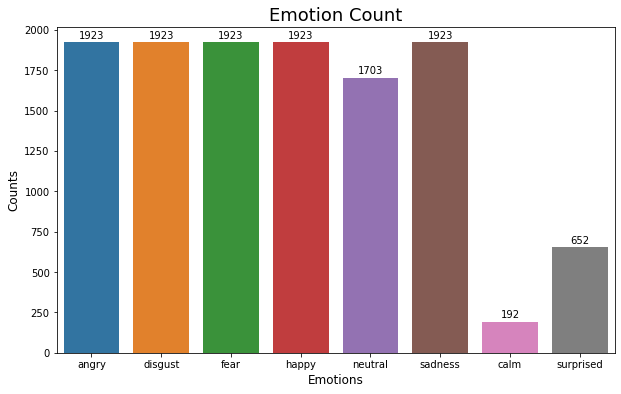

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title("Emotion Count", size=18)
cplot = sns.countplot(x='emotion', data=df)
plt.xlabel("Emotions", size=12)
plt.ylabel("Counts", size=12)
for p in cplot.patches:
    cplot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points')

In [37]:
!pip install librosa

  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
  Using cached resampy-0.4.2-py3-none-any.whl (3.1 MB)
     ---------------------------------------- 2.5/2.5 MB 755.1 kB/s eta 0:00:00
  Using cached audioread-3.0.0.tar.gz (377 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached soundfile-0.11.0-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached pooch-1.6.0-py3-none-any.whl (56 kB)
     ---------------------------------------- 23.2/23.2 MB 2.5 MB/s eta 0:00:00
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23706 sha256=6cf2f45b9763ed009629c38053aadddf587b80ff0de482718610b5c68a1a7cc6
  Stored in directory: c:\users\laode\appdata\local\pip\cache\wheels\3d\e0\4b\51b8aa4a0e2b6361c14943f7a7c2c7adb7b9cd419e0a1b720d
Successfully built audioread


In [38]:
import librosa
import librosa.display
import IPython.display as ipd

In [39]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'Crema',
 'models',
 'Ravdess',
 'Savee',
 'Speech Emotion Recognition.ipynb',
 'Tess']

In [40]:
emotions = list(df['emotion'].unique())
emotions

['angry',
 'disgust',
 'fear',
 'happy',
 'neutral',
 'sadness',
 'calm',
 'surprised']

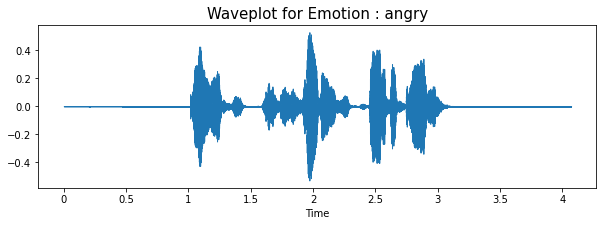

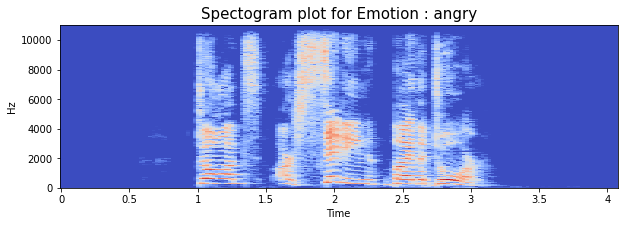

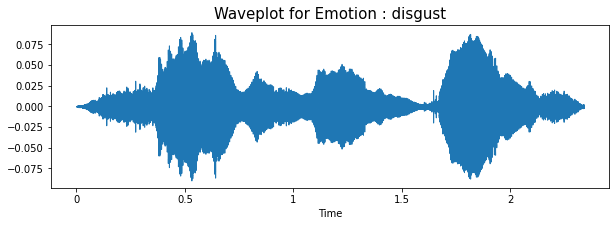

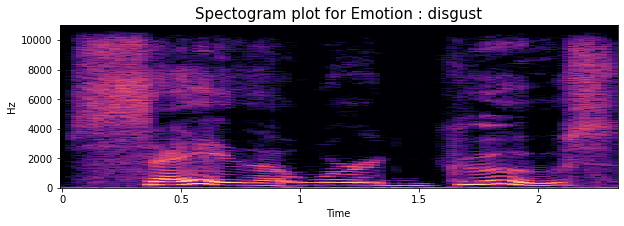

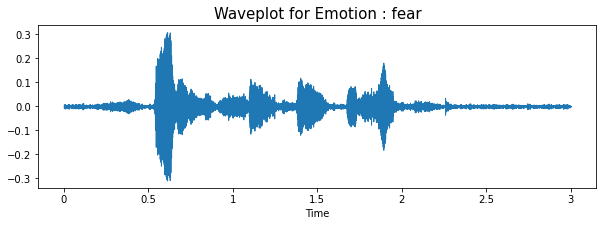

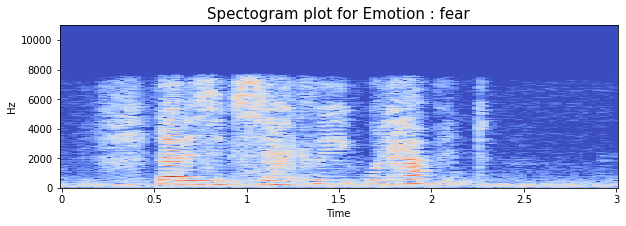

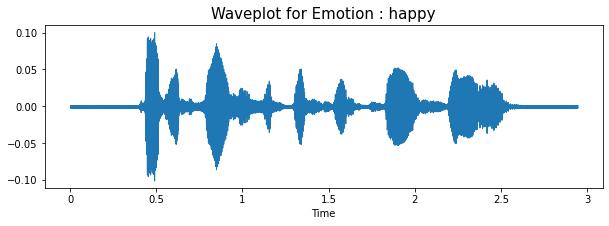

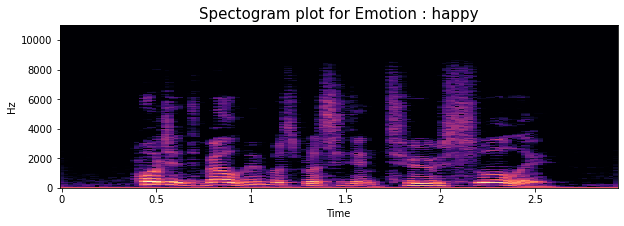

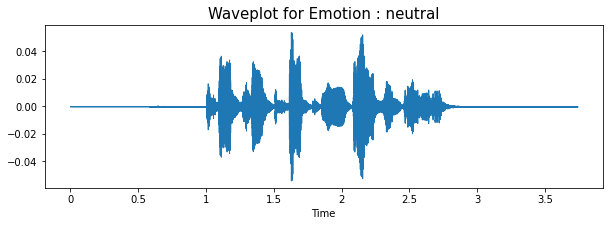

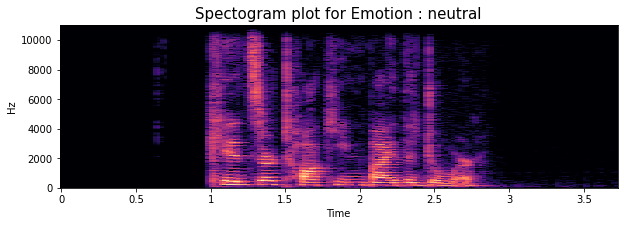

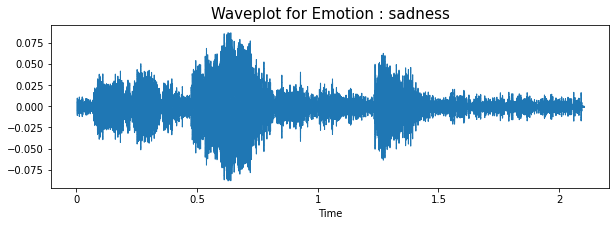

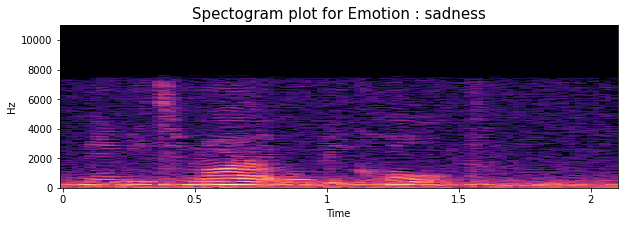

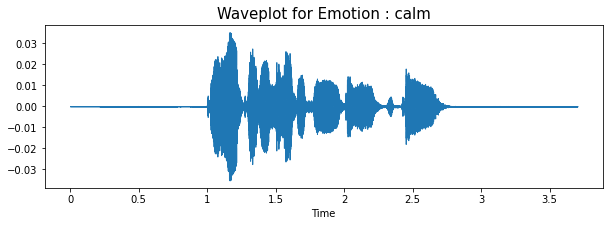

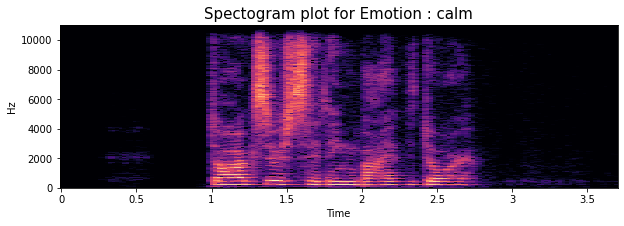

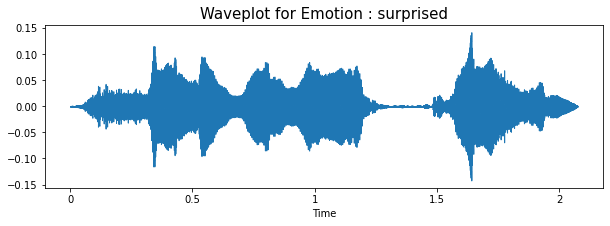

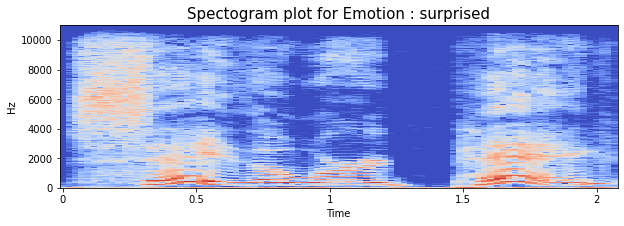

In [41]:
for i in emotions:
    sample = df[df['emotion']==i].sample()
    emotion = sample['emotion'].values[0]
    file_path = sample['file_path'].values[0]
    plt.figure(figsize=(10,3))
    plt.title("Waveplot for Emotion : {}".format(emotion), size=15)
    data, sample_rate = librosa.load(file_path)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()
    plt.figure(figsize=(10,3))
    plt.title("Spectogram plot for Emotion : {}".format(emotion), size=15)
    audio = librosa.stft(data)
    audio_db = librosa.amplitude_to_db(abs(audio))
    librosa.display.specshow(audio_db, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.show()

# Data Preprocessing

## Feature Extraction

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [47]:
import numpy as np

def feature_extraction(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [48]:
len(df)

12162

In [49]:
from tqdm import tqdm

extracted_features=[]
for index, row in tqdm(df.iterrows()):
    emotion = row['emotion']
    file_path = row['file_path']
    data = feature_extraction(file_path)
    extracted_features.append([data, emotion])

12162it [07:38, 26.51it/s]


In [50]:
extracted_features[:2]

[[array([-3.4646527e+02,  1.2671444e+02, -1.4558485e+01,  4.2530594e+01,
         -3.0029399e+00,  1.2400566e+01, -1.5391998e+01, -7.9458213e+00,
         -5.3372073e+00, -7.9562087e+00, -6.5085974e+00, -5.8087544e+00,
         -1.0416871e+00, -1.4153826e+01,  6.7006664e+00, -9.9352207e+00,
         -1.0769011e+01,  2.8718597e-01, -6.1500311e+00, -5.1274166e+00,
         -8.6473503e+00, -3.7732892e+00, -8.0399437e+00, -3.5200870e+00,
         -2.7950685e+00, -9.6890569e-01, -2.0158598e+00, -3.8693025e+00,
          9.1008812e-02, -3.5686553e+00, -5.1046222e-01, -2.2986114e+00,
         -8.1278378e-01, -2.3691454e+00, -5.1851349e+00, -4.3075504e+00,
         -5.0516844e+00, -2.9179437e+00, -3.4979134e+00, -2.3621104e+00],
        dtype=float32),
  'angry'],
 [array([-3.9441000e+02,  1.4173885e+02, -2.4022491e+01,  5.6978382e+01,
         -1.5013101e+00,  2.0848898e+01, -1.9336273e+01,  1.0325636e+00,
         -4.0465622e+00, -9.4349689e+00, -2.1454024e+00, -1.0414154e+01,
          2.58

In [51]:
df_feature_extraction = pd.DataFrame(extracted_features, columns=['features', 'emotion'])
df_feature_extraction.head()

,features,emotion
0,"[-346.46527, 126.71444, -14.558485, 42.530594,...",angry
1,"[-394.41, 141.73885, -24.022491, 56.978382, -1...",disgust
2,"[-355.39957, 120.01631, -6.806266, 34.998806, ...",fear
3,"[-342.06683, 125.692116, -17.13771, 42.41375, ...",happy
4,"[-372.29007, 129.78448, -8.920518, 41.944756, ...",neutral


In [52]:
import numpy as np

X = np.array(df_feature_extraction['features'].tolist())
y = np.array(df_feature_extraction['emotion'].tolist())

In [53]:
X[:5]

array([[-3.46465271e+02,  1.26714439e+02, -1.45584850e+01,
         4.25305939e+01, -3.00293994e+00,  1.24005661e+01,
        -1.53919983e+01, -7.94582129e+00, -5.33720732e+00,
        -7.95620871e+00, -6.50859737e+00, -5.80875444e+00,
        -1.04168713e+00, -1.41538258e+01,  6.70066643e+00,
        -9.93522072e+00, -1.07690105e+01,  2.87185967e-01,
        -6.15003109e+00, -5.12741661e+00, -8.64735031e+00,
        -3.77328920e+00, -8.03994370e+00, -3.52008700e+00,
        -2.79506850e+00, -9.68905687e-01, -2.01585984e+00,
        -3.86930251e+00,  9.10088122e-02, -3.56865525e+00,
        -5.10462224e-01, -2.29861140e+00, -8.12783778e-01,
        -2.36914539e+00, -5.18513489e+00, -4.30755043e+00,
        -5.05168438e+00, -2.91794372e+00, -3.49791336e+00,
        -2.36211038e+00],
       [-3.94410004e+02,  1.41738846e+02, -2.40224915e+01,
         5.69783821e+01, -1.50131011e+00,  2.08488979e+01,
        -1.93362732e+01,  1.03256357e+00, -4.04656219e+00,
        -9.43496895e+00, -2.14

In [54]:
y[:5]

array(['angry', 'disgust', 'fear', 'happy', 'neutral'], dtype='<U9')

In [55]:
len(X)

12162

In [56]:
len(y)

12162

In [57]:
type(X)

numpy.ndarray

In [58]:
type(y)

numpy.ndarray

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
label_encoder = LabelEncoder()

In [61]:
from keras.utils import np_utils

y = np_utils.to_categorical(label_encoder.fit_transform(y))

In [62]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [63]:
len(y)

12162

In [64]:
type(y)

numpy.ndarray

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("X without Scaling :")
print(X, '\n')
print("X with Scaling :")
print(X_scaled)

X without Scaling :
[[-346.46527    126.71444    -14.558485  ...   -2.9179437   -3.4979134
    -2.3621104]
 [-394.41       141.73885    -24.022491  ...   -0.8362918   -2.408401
    -1.1116189]
 [-355.39957    120.01631     -6.806266  ...   -1.6646256   -1.0536956
    -1.2815596]
 ...
 [-375.2638      72.43364     31.662104  ...    3.4386232    4.4365234
     3.577164 ]
 [-426.728       74.20855     24.606398  ...    7.248207    10.590129
     7.7258043]
 [-414.41348     60.11076     26.068558  ...    2.6750808    5.4071164
     3.5427551]] 

X with Scaling :
[[0.8142977  0.71417946 0.42529392 ... 0.11276722 0.12844661 0.12611826]
 [0.76455754 0.7978103  0.33703458 ... 0.1543173  0.15074071 0.15766469]
 [0.8050288  0.6768954  0.49758953 ... 0.13778363 0.17846133 0.15337756]
 ...
 [0.7844207  0.41203427 0.85633755 ... 0.23964524 0.29080477 0.27594966]
 [0.73102933 0.421914   0.79053754 ... 0.3156851  0.41672274 0.38060838]
 [0.743805   0.34344098 0.80417335 ... 0.22440483 0.3106655  0.27

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2, shuffle=True)

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9729, 40)
(9729, 8)
(2433, 40)
(2433, 8)


In [80]:
X_train=np.expand_dims(X_train,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape

((9729, 40, 1), (2433, 40, 1))

# Modeling

In [82]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [85]:
num_labels = y.shape[1]
num_labels

8

In [86]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=5,strides=2,padding='same'),
    tf.keras.layers.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=5,strides=2,padding='same'),
    tf.keras.layers.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=5,strides=2,padding='same'),
    tf.keras.layers.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=5,strides=2,padding='same'),
    tf.keras.layers.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool1D(pool_size=3,strides=2,padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(num_labels,activation='softmax')
])

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 512)           3072      
                                                                 
 batch_normalization (BatchN  (None, 40, 512)          2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 512)           1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 20, 512)          2048      
 hNormalization)                                                 
                                                      

In [88]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall'),
    tf.keras.metrics.AUC(name='AUC'),
    tf.keras.metrics.AUC(name='Precision-Recall Curve', curve='PR'), # precision-recall curve
]

In [89]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=METRICS)

In [91]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

start = datetime.now()

history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stop,lr_reduction], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
153/153 [==============================] - 66s 430ms/step - loss: 0.6575 - accuracy: 0.7445 - Precision: 0.8268 - Recall: 0.6713 - AUC: 0.9685 - Precision-Recall Curve: 0.8531 - val_loss: 1.4019 - val_accuracy: 0.5376 - val_Precision: 0.6005 - val_Recall: 0.4949 - val_AUC: 0.8913 - val_Precision-Recall Curve: 0.6374 - lr: 0.0010
Epoch 2/50
153/153 [==============================] - 66s 430ms/step - loss: 0.6346 - accuracy: 0.7556 - Precision: 0.8343 - Recall: 0.6826 - AUC: 0.9706 - Precision-Recall Curve: 0.8633 - val_loss: 1.2039 - val_accuracy: 0.5750 - val_Precision: 0.6484 - val_Recall: 0.4949 - val_AUC: 0.9079 - val_Precision-Recall Curve: 0.6641 - lr: 0.0010
Epoch 3/50
153/153 [==============================] - 66s 431ms/step - loss: 0.6169 - accuracy: 0.7649 - Precision: 0.8369 - Recall: 0.6977 - AUC: 0.9722 - Precision-Recall Curve: 0.8699 - val_loss: 1.5445 - val_accuracy: 0.5290 - val_Precision: 0.5767 - val_Recall: 0.4990 - val_AUC: 0.8854 - val_Precision-Recall C

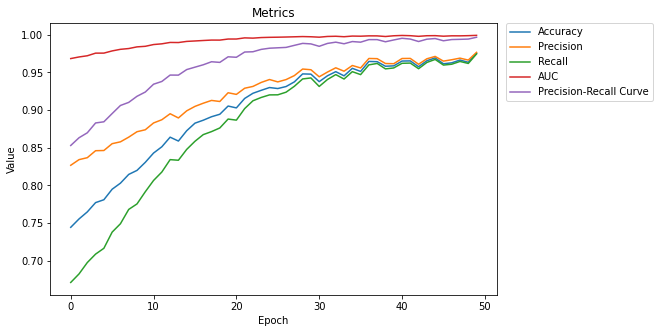

In [93]:
#Plot Metrics
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['Precision'])
plt.plot(history.history['Recall'])
plt.plot(history.history['AUC'])
plt.plot(history.history['Precision-Recall Curve'])
plt.title('Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Precision', 'Recall', 'AUC', 'Precision-Recall Curve'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

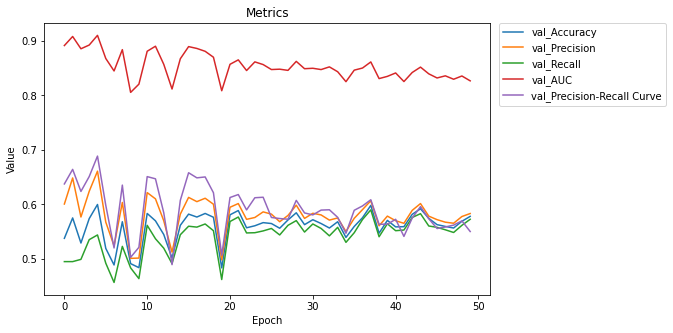

In [94]:
plt.figure(figsize = (8,5))
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_Precision'])
plt.plot(history.history['val_Recall'])
plt.plot(history.history['val_AUC'])
plt.plot(history.history['val_Precision-Recall Curve'])
plt.title('Metrics')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['val_Accuracy', 'val_Precision', 'val_Recall', 'val_AUC', 'val_Precision-Recall Curve'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()